## Introduction to PCA
* Use PCA to reduce the dimensionality of a synthetic 2D dataset to 1D
* Visualize the transformation 
* Explain every step mathematically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Step 1: Generate a Synthetic Dataset

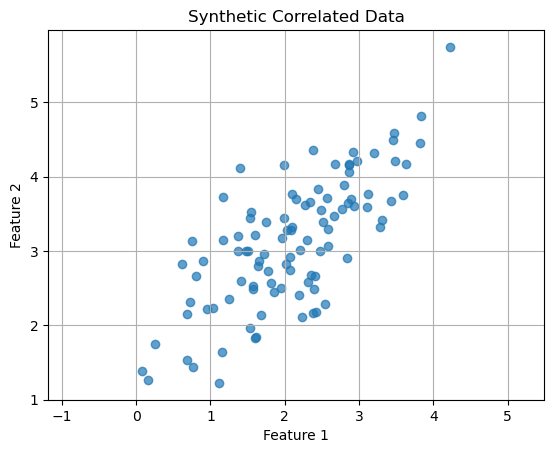

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic 2D dataset
mean = [2, 3]
cov = [[1, 0.8], [0.8, 1]]  # Correlated features
X = np.random.multivariate_normal(mean, cov, 100)

# Visualize it
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Synthetic Correlated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

### Step 2: Standardize the Data
PCA assumes data is centered at zero (mean of each feature is 0).

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mean should now be ~0
print("Means:", np.mean(X_scaled, axis=0))

Means: [ 4.49640325e-16 -1.04694031e-15]


### Step 3: Manual PCA Step-by-Step

Step 3.1: Compute Covariance Matrix

$$cov(X) = (1/(n−1)) * X^T * X$$


In [6]:
# Compute covariance matrix
cov_matrix = np.cov(X_scaled.T)
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[1.01010101 0.74497021]
 [0.74497021 1.01010101]]


The **.T** in X_scaled.T stands for the **transpose** of the matrix.

**Why Transpose?**

In NumPy, X_scaled is a 2D array (a matrix) of shape:

X_scaled.shape  # (100, 2)

This means:
* 100 rows (samples)
* 2 columns (features)

When you compute the covariance matrix, numpy.cov() expects each row to be a variable (feature) and each column to be an observation (sample) — the opposite of how X_scaled is structured.

So, to match this requirement:

cov_matrix = np.cov(X_scaled.T)

X_scaled.T changes shape to (2, 100), where:
* each row is a feature
* each column is an observation (sample)

That’s the correct format for np.cov() to compute the covariance between features.

### Step 3.2: Compute Eigenvectors and Eigenvalues

In [8]:
# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [0.2651308  1.75507122]
Eigenvectors:
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


* The eigenvectors are the directions of the principal components.
* The eigenvalues tell us how much variance is explained along each principal component.

### Step 3.3: Sort Eigenvectors by Eigenvalues

In [9]:
# Sort by eigenvalues descending
idxs = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[:, idxs]

print("Sorted Eigenvalues:", eigenvalues)


Sorted Eigenvalues: [1.75507122 0.2651308 ]


### Step 3.4: Project Data onto Principal Components

Let's reduce the data from 2D to 1D using the first principal component.


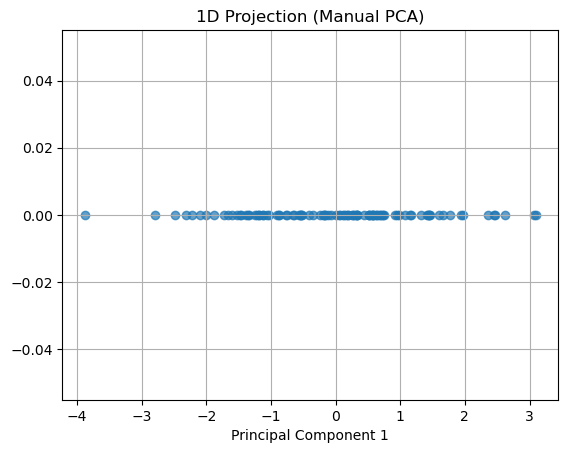

In [13]:
# Select first PC
first_pc = eigenvectors[:, 0]

# Project the data
# Note that The @ operator in Python is used 
# for matrix multiplication (also known as the dot product).
X_pca_manual = X_scaled @ first_pc

# Visualize
plt.scatter(X_pca_manual, np.zeros_like(X_pca_manual), alpha=0.7)
plt.title("1D Projection (Manual PCA)")
plt.xlabel("Principal Component 1")
plt.grid(True)
plt.show()

### Step 4: PCA using Scikit-learn
Now compare with sklearn’s PCA.


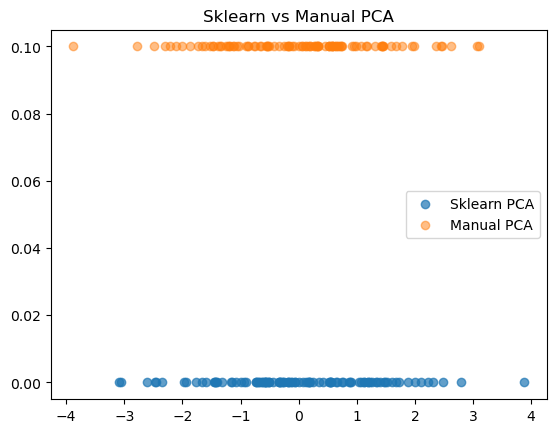

Explained Variance Ratio: [0.86876026]


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Compare to manual version
plt.scatter(X_pca, np.zeros_like(X_pca), alpha=0.7, label="Sklearn PCA")
plt.scatter(X_pca_manual, np.ones_like(X_pca_manual)*0.1, alpha=0.5, label="Manual PCA")
plt.title("Sklearn vs Manual PCA")
plt.legend()
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


### Step 5: Interpret What PCA Did
**What PCA Means**
* PCA rotated our data so that the first new axis (PC1) points in the direction of maximum variance.
* This first principal component now captures the most important pattern in the data.
* Reducing to 1D means we discard the second component (lower variance) and retain only the major trend.

**Geometric Intuition**
* You can imagine PCA as fitting an axis to your data cloud, then flattening everything onto that axis.
* This is useful for dimensionality reduction, visualization, and noise filtering.

### Step 6: Visualize Everything

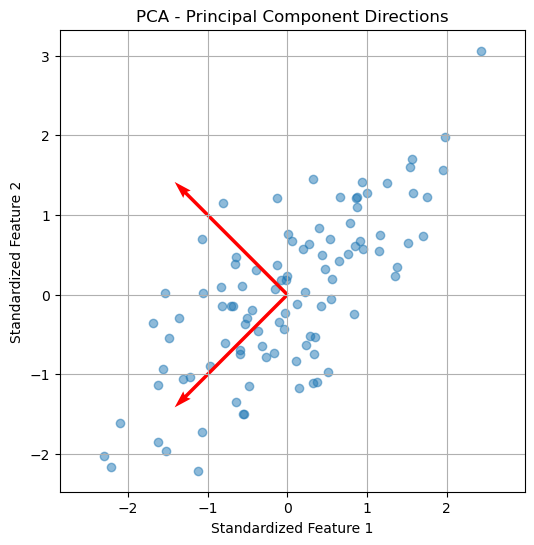

In [12]:
# Plot the original data and PCs
plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
origin = np.mean(X_scaled, axis=0)

for length, vector in zip(eigenvalues, eigenvectors.T):
    v = vector * 2  # Scale for visibility
    plt.quiver(*origin, *v, scale=1, scale_units='xy', angles='xy', color='r')

plt.title("PCA - Principal Component Directions")
plt.xlabel("Standardized Feature 1")
plt.ylabel("Standardized Feature 2")
plt.grid(True)
plt.axis("equal")
plt.show()